# One Step Methods
Given the first order equation
\begin{equation} 
y^{'} = 2y-0.1y^2,
\end{equation}
with the initial condition
\begin{equation} 
y(0) = 1.
\end{equation}

Aproximate the solution of the inital value problem for the interval $0 \leq t \leq 4$ using $N=8$.
Using the:
1. Euler method:
$$ w_{i+1}=w_i+hf(t_i,w_i);$$

2. Midpoint method:
$$ w_{i+1}=w_i+hf(t_i+\frac{h}{2},w_i+\frac{h}{2}k1),$$
where $k1=f(t_i,w_i)$;

3. 4th Order Runge Kutta method:
$$ w_{i+1}=w_i+\frac{h}{6}(k1+2k2+2k3+k4),$$
where $$k1=f(t_i,w_i),$$
$$k2=f(t_i+\frac{h}{2},w_i+\frac{h}{2}k1),$$
$$k3=f(t_i+\frac{h}{2},w_i+\frac{h}{2}k2),$$
$$k4=f(t_i+h,w_i+hk3);$$

4. Imposter-Butler method:
$$ w_{i+1}=w_i+\frac{h}{4}(k1+2k2),$$
where $$k1=f(t_i,w_i),$$
$$k2=f(t_i+h,w_i+hk1).$$

5. Leap-Frog method:
$$ w_{i+1}=w_{i-1}+2h(k1),$$
where $$k1=f(t_i,w_i).$$
What is the concern with the leap frog method. 

### DECLARING LIBRARIES

In [14]:
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings
warnings.filterwarnings("ignore")

### Outputting Table

In [15]:
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

## Setting up the discrete time axis
$$ h=\frac{4-0}{N}=0.5 $$
$$t_i=t_0+ih$$
$$t_i=0+0.5i$$
for $i=0,1,2,...,8.$

In [16]:
N=8
x_end=4.0
h=((x_end-0)/N)

INITIALCONDITION=1
time=np.zeros(N+1)

table = ListTable()
table.append(['time', 'Euler', 'Mid', 'RK','Imposter','Leap Frog'])


### Defining the function
From the initial value problem the function
$$ f(t,y)= 2y-0.1y^2. $$

In [17]:
def myfun(w):
    return 2*w-0.1*w*w

## NUMERICAL SOLUTION

In [18]:
time[0]=0

## Euler Method
$$w_0=1$$
$$ w_{i+1}=w_i+h(2w_i-0.1w_i^2)$$
$$N=0,1,2,...7$$

In [19]:
Euler=np.zeros(N+1)
Euler[0]=INITIALCONDITION

for i in range (0,N):
    # Euler Method
    Euler[i+1]=Euler[i]+h*myfun(Euler[i])

## Midpoint Method
$$w_0=1$$
$$k=2w_i-0.1w_i^2$$
$$ w_{i+1}=w_i+h(2(w_i+\frac{h}{2}k)-0.1(w_i+\frac{h}{2}k)^2)$$
$$N=0,1,2,...7$$

In [20]:
Midpoint=np.zeros(N+1)
Midpoint[0]=INITIALCONDITION

for i in range (0,N):
    # Mid-point method
    Midpoint[i+1]=Midpoint[i]+h*myfun(Midpoint[i]+h/2*myfun(Midpoint[i]))

## 4th Order Runge Kutta Method
$$w_0=1$$
$$k1=2w_i-0.1w_i^2$$
$$k2=2(w_i+\frac{h}{2}k1)-0.1(w_i+\frac{h}{2}k1)^2$$
$$k3=2(w_i+\frac{h}{2}k2)-0.1(w_i+\frac{h}{2}k2)^2$$
$$k4=2(w_i+hk)-0.1(w_i+hk)^2$$
$$ w_{i+1}=w_i+\frac{h}{6}(k1+2k2+2k3+k4)$$
$$N=0,1,2,...7$$

In [21]:
RK4=np.zeros(N+1)
RK4[0]=INITIALCONDITION

for i in range (0,N):
    # 4th Order Runge Kutta
    k1=myfun(RK4[i])
    k2=myfun(RK4[i]+h/2*k1)
    k3=myfun(RK4[i]+h/2*k2)
    k4=myfun(RK4[i]+h*k3)
    RK4[i+1]=RK4[i]+h/6*(k1+2*k2+2*k3+k4)
    

## Imposter Butler Method
$$w_0=1$$
$$k1=2w_i-0.1w_i^2$$
$$k2=2(w_i+hk1)-0.1(w_i+hk1)^2$$
$$ w_{i+1}=w_i+\frac{h}{4}(k1+2k2)$$
$$N=0,1,2,...7$$

In [22]:
Imposter=np.zeros(N+1)
Imposter[0]=INITIALCONDITION
i=0
table.append([time[i], Euler[i], Midpoint[i], RK4[i],Imposter[i]])
for i in range (0,N):
    #Imposter method
    k1=myfun(Imposter[i])
    k2=myfun(Imposter[i]+h*k3)
    Imposter[i+1]=Imposter[i]+2*h/4*(2*k1+2*k2)
    time[i+1]=time[i]+h
   

## Leap-Frog method
$$ w_{i+1}=w_{i-1}+2h(k1),$$
where $$k1=2w_i-0.1w_i^2.$$

In [32]:
LeapFrog=np.zeros(N+1)
LeapFrog[0]=INITIALCONDITION
LeapFrog[1]=Euler[2]

i=0
table.append([time[i], Euler[i], Midpoint[i], RK4[i],Imposter[i],LeapFrog[i]])
for i in range (1,N):
    #Imposter method
    k1=myfun(LeapFrog[i])
    LeapFrog[i+1]=LeapFrog[i-1]+2*h*(k1)
    time[i+1]=time[i]+h
    table.append([time[i+1], Euler[i+1], Midpoint[i+1], RK4[i+1],Imposter[i+1],LeapFrog[i+1]])

## Plotting

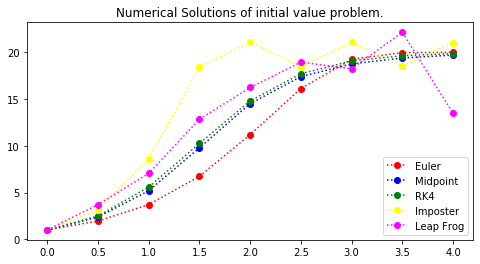

In [33]:
fig = plt.figure(figsize=(8,4))
plt.plot(time,Euler,'o:',color='red',label='Euler')
plt.plot(time,Midpoint,'o:',color='blue',label='Midpoint')
plt.plot(time,RK4,'o:',color='green',label='RK4')
plt.plot(time,Imposter,'o:',color='yellow',label='Imposter')
plt.plot(time,LeapFrog,'o:',color='magenta',label='Leap Frog')

plt.legend(loc=4)
plt.title('Numerical Solutions of initial value problem.')
plt.show()

In [12]:
table

[['time', 'Euler', 'Mid', 'RK', 'Imposter', 'Leap Frog'],
 [0.0, 1.0, 1.0, 1.0, 1.0],
 [0.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0.5, 1.95, 2.36621875, 2.4973140745034703, 1.828354103622306, 1.9],
 [1.0,
  3.7098750000000003,
  5.19438758389418,
  5.581882795387722,
  3.1792956569283346,
  4.439],
 [1.5,
  6.73159137421875,
  9.77881461292582,
  10.250670627504523,
  5.27210794647557,
  8.8075279],
 [2.0,
  11.197466626964687,
  14.519443452104497,
  14.812884418161534,
  8.243922547632055,
  14.296801029072158],
 [2.5,
  16.125770310829978,
  17.40121357626255,
  17.70715620549379,
  11.899511859117052,
  16.96127799165644],
 [3.0,
  19.24951721577768,
  18.761663288245703,
  19.080300940495654,
  15.487688268593597,
  19.45086190136012],
 [3.5,
  19.971838779529293,
  19.397552928361538,
  19.6459932243498,
  18.03499834285824,
  18.029398923798414],
 [4.0,
  19.99996034728308,
  19.703035811592716,
  19.865924950313506,
  19.25729194968363,
  23.003737193610604]]

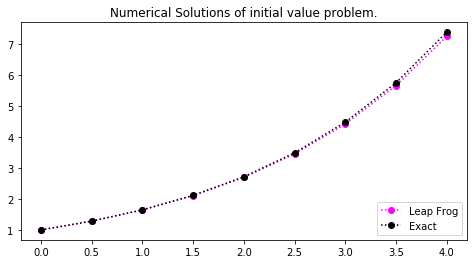

In [31]:
LeapFrog=np.zeros(N+1)
LeapFrog[0]=1
Exact=np.exp(0.5*time)
LeapFrog[1]=Exact[1]

i=0
for i in range (1,N):
    #Imposter method
    k1=myfun(LeapFrog[i])
    LeapFrog[i+1]=LeapFrog[i-1]+2*h*(0.5)*LeapFrog[i]
    time[i+1]=time[i]+h

fig = plt.figure(figsize=(8,4))
plt.plot(time,LeapFrog,'o:',color='magenta',label='Leap Frog')
plt.plot(time,Exact,'o:',color='black',label='Exact')


plt.legend(loc=4)
plt.title('Numerical Solutions of initial value problem.')
plt.show()